# Cap. 4 - Núcleo da Linguagem Python, Parte II

Este capítulo dá continuidade a apresentação da linguagem Python que começamos no Cap. 2.

## **Erros e Exceções**

O Python distingue dois tipos de erro:

* *syntax errors* são erros relacionados à "gramática" da linguagem. Esses erros são verificados *antes* da execução do código;

* *exceptions* são erros que ocorrem *durante* a execução do código (*runtime errors*);

**Exemplos de erros de sintaxe**

In [ ]:
#usamos uma palavra reservada
for lambda_ in range(8):
    print(lambda_)

0
1
2
3
4
5
6
7


In [ ]:
#falta de parênteses
for f in range(8:
    print(f)

SyntaxError: ignored

In [ ]:
a = [1, 2, 3, 4,
b = 5

SyntaxError: ignored

In [ ]:
#qual o erro aqui?
a = 5
if a == 5:
    print(a)

5


**Exemplos de exceções**

In [ ]:
#NameError
print('4z = ', 4*z)

NameError: ignored

In [ ]:
#ZeroDivisionError
a, b = 0, 5
b / a

ZeroDivisionError: ignored

In [ ]:
#TypeError
'00' + 7

TypeError: ignored

In [ ]:
#ValueError
float('hello')

ValueError: ignored

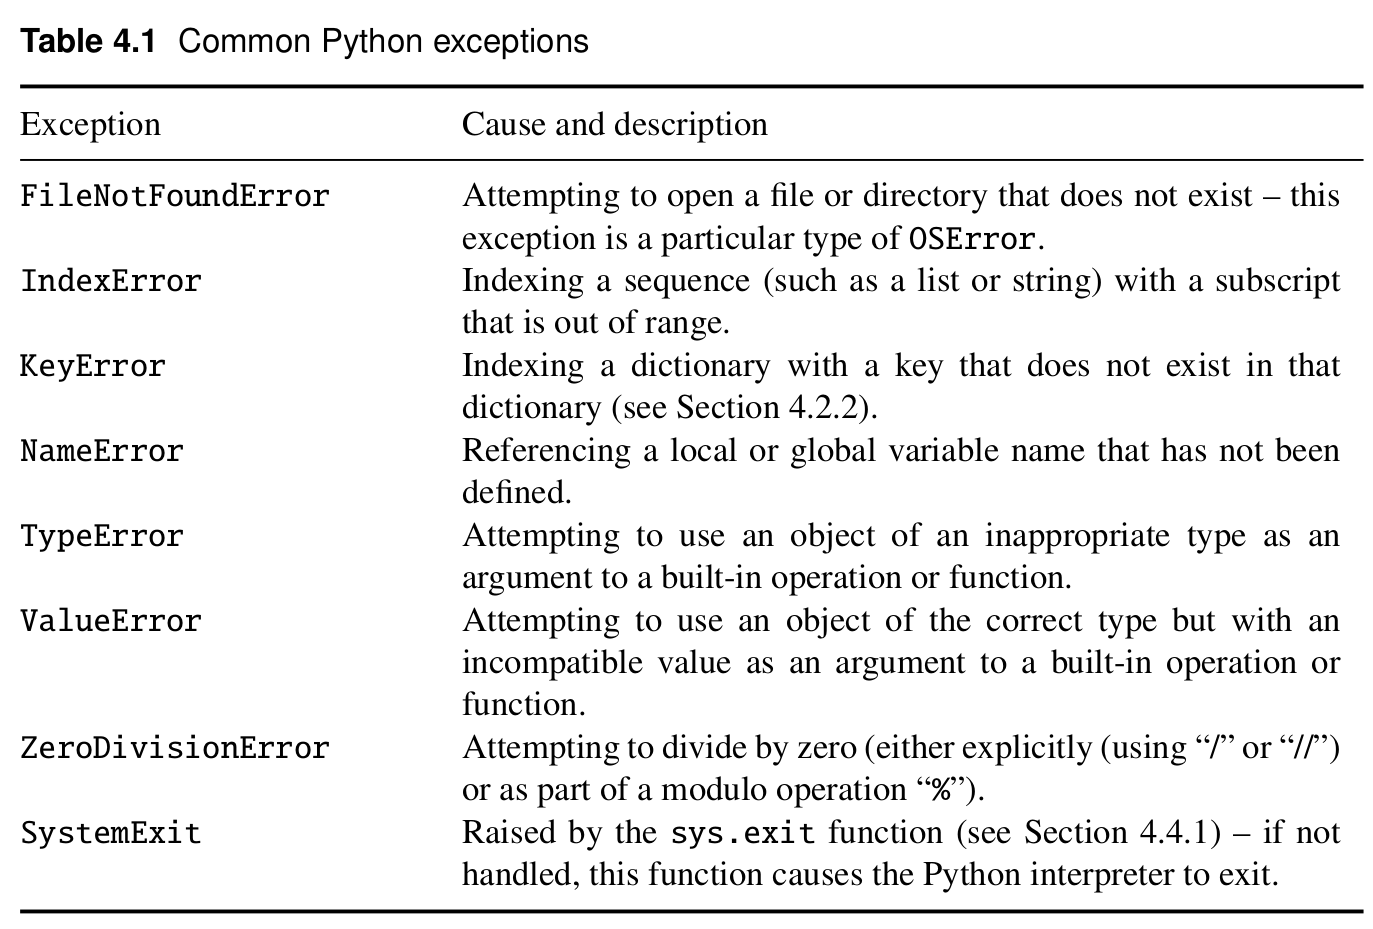

*Exemplo E4.2:* *traceback report*.

In [ ]:
math.sin.__name__

'sin'

In [ ]:
import math

def func(x):
    def trig(x):
        for f in (math.sin, math.cos, math.tan):
            print ('{f}({x}) = {res}'.format(f=f.__name__ , x=x, res=f(x)))
    def invtrig(x):
        for f in (math.asin, math.acos, math.atan ):
            print('{f}({x}) = {res}'.format(f=f.__name__ , x=x, res=f(x)))
    trig(x)
    invtrig(x)

In [ ]:
func(1.2)

sin(1.2) = 0.9320390859672263
cos(1.2) = 0.3623577544766736
tan(1.2) = 2.5721516221263188


ValueError: ignored

O erro ocorre na linha 9 ao tentar calcular:

In [ ]:
#como -1<sin(x)<1, asin(1.2) não existe
math.asin(1.2)

ValueError: ignored

**Lidando e criando exceções**

Para lidar com erros de execução o Python usa a estrutura *try...except*:

Por exemplo:

In [ ]:
def invx(x):
    try:
        y = 1. / x
        print('1 /', x, ' = ',y)
    except(ZeroDivisionError, TypeError):
        print('x é zero ou não é um número!')

In [ ]:
invx(1)

1 / 1  =  1.0


In [ ]:
invx(0)

x é zero ou não é um número!


In [ ]:
invx('a')

x é zero ou não é um número!


Podemos ter mais de um *except*:

In [ ]:
def invx(x):
    try:
        y = 1. / x
        print('1 /', x, ' = ',y)
    except ZeroDivisionError:
        print('1/0 não está definido.')
    except TypeError:
        print('variável não é numérica.')

In [ ]:
invx(0)

1/0 não está definido.


In [ ]:
invx('10')

variável não é numérica.


Temos ainda as opções *else* e *finally*:

In [ ]:
def invx(x):
    try:
        y = 1. / x
        print('1 /', x, ' = ',y)
    except ZeroDivisionError:
        print('1/0 não está definido.')
    except TypeError:
        print('variável não é numérica.')
    else:
        print('Passa por aqui sem erro.')
    finally:
        print('Passa por aqui, com erro ou não.')

In [ ]:
invx(1)

1 / 1  =  1.0
Passa por aqui sem erro.
Passa por aqui, com erro ou não.


In [ ]:
invx('aas')

variável não é numérica.
Passa por aqui, com erro ou não.


Para criar exceções usamos o *raise*:

In [ ]:
n = 2
if n % 2:
    raise ValueError('n deve ser par!')

Além disso, também podemos usar o *assert*:

In [ ]:
assert 2 == 2, "Nada acontece"

In [ ]:
assert 1 == 2, "1 diferente de 2"

AssertionError: ignored

*Exemplo E4.3:* Função que representa vetores em duas e três dimensões.

In [ ]:
def str_vector(v):
    assert type(v) is list or type(v) is tuple,\
           'o argumento deve ser list ou tuple.'
    assert len(v) in (2, 3),\
           'o vetor deve ter duas ou três dimensões.'

    unit_vectors = ['i', 'j', 'k']

    s = []

    for i, component in enumerate(v):
        s.append(f'{component}{unit_vectors[i]}')

    return ' + '.join(s).replace('+ -', '- ')

In [ ]:
str_vector([2,-3,-4])

'2i - 3j - 4k'

In [ ]:
str_vector(1)

AssertionError: ignored

In [ ]:
str_vector([1])

AssertionError: ignored

In [ ]:
str_vector([1,2,3,4])

IndexError: ignored

In [ ]:
def produto_vetorial3d(a, b):

    assert len(a) == len(b) == 3, 'Os vetores devem ter 3 dimensões.'

    return [a[1]*b[2] - a[2]*b[1],
            a[2]*b[0] - a[0]*b[2],
            a[0]*b[1] - a[1]*b[0]]

In [ ]:
produto_vetorial3d([1, 2, -1], [2, 0, -1])

[-2, -1, -4]

In [ ]:
produto_vetorial3d([1, 2], [2, 0, -1])

AssertionError: ignored

## **Dicionários e conjuntos**

Dicionário é objeto do Python do tipo *associative array* ou *hashable*. Tal como listas ou tuplas, dicionários podem conter qualquer tipo de objeto. Porém, diferentemente de listas e tuplas que são indexadas por inteiros, dicionários são indexados por chaves únicas. Essas chaves podem ser quaisquer objetos imutáveis. Podemos então dizer que dicionários são pares de chaves->valores. Além disso, eles são objetos mutáveis.

Para definir um dicionário pode usar:



```
{CHAVE1: VALOR, CHAVE2: VALOR, ...}
```

Por exemplo:


In [ ]:
alturas = {
    'Burj Khalifa': 828.,
    'One World Trade Center': 541.3,
    'Mercury City Tower': -1.,
    'Q1': 323.,
    'Carlton Centre': 223.,
    'Gran Torre Santiago': 300.,
    'Mercury City Tower': 339.
}

In [ ]:
type(alturas)

dict

In [ ]:
alturas

{'Burj Khalifa': 828.0,
 'One World Trade Center': 541.3,
 'Mercury City Tower': 339.0,
 'Q1': 323.0,
 'Carlton Centre': 223.0,
 'Gran Torre Santiago': 300.0}

In [ ]:
print(alturas)

{'Burj Khalifa': 828.0, 'One World Trade Center': 541.3, 'Mercury City Tower': 339.0, 'Q1': 323.0, 'Carlton Centre': 223.0, 'Gran Torre Santiago': 300.0}


Podemos acessar os valores usando a sintaxe:

```
DICT[CHAVE]
```

Por exemplo:

In [ ]:
alturas['One World Trade Center']

541.3

In [ ]:
predio = 'Carlton Centre'
alturas[predio]

223.0

Podemos adicionar novos elementos via:

In [ ]:
alturas['Empire State Building'] = 381.
alturas['The Shard'] = 306.

In [ ]:
alturas

{'Burj Khalifa': 828.0,
 'One World Trade Center': 541.3,
 'Mercury City Tower': 339.0,
 'Q1': 323.0,
 'Carlton Centre': 223.0,
 'Gran Torre Santiago': 300.0,
 'Empire State Building': 381.0,
 'The Shard': 306.0}

In [ ]:
#acessar chaves não existentes resulta em error
alturas['E90']

KeyError: ignored

Podemos definir dicionários usando o construtor *dict* em lista de pares:

In [ ]:
ordinal = dict([(1 , 'First'), (2, 'Second'), (3, 'Third')])
mass = dict(Mercury=3.301e23, Venus=4.867e24, Earth=5.972e24)

In [ ]:
ordinal,mass

({1: 'First', 2: 'Second', 3: 'Third'},
 {'Mercury': 3.301e+23, 'Venus': 4.867e+24, 'Earth': 5.972e+24})

In [ ]:
ordinal[2], mass['Earth']

('Second', 5.972e+24)

Dicionário são objetos iteráveis:

In [ ]:
#note que a iteração retorna as chaves
for x in ordinal:
    print(x)

1
2
3


In [ ]:
#note que a iteração retorna as chaves
for x in ordinal:
    print(x, ordinal[x])

1 First
2 Second
3 Third


**Métodos de dicionários**

* *get()* pode ser usado para receber o valor de uma data chave:

In [ ]:
mass.get('Earth')

5.972e+24

In [ ]:
mass['Earth']

5.972e+24

In [ ]:
mass['Pluto']

KeyError: ignored

In [ ]:
#não retorna erro, retorna None
aaa=mass.get('Pluto')

In [ ]:
aaa is None

True

In [ ]:
mass

{'Mercury': 3.301e+23, 'Venus': 4.867e+24, 'Earth': 5.972e+24}

In [ ]:
#pode retornar um valor customizado caso a chave não exista
mass.get('Pluto', -1)

-1

* *keys*: retorna as chaves;
* *values*: retorna os valores.
* *items*: retorna uma tupla com pares de chaves e valores.

In [ ]:
mass.keys()

dict_keys(['Mercury', 'Venus', 'Earth'])

In [ ]:
mass.values()

dict_values([3.301e+23, 4.867e+24, 5.972e+24])

In [ ]:
mass.items()

dict_items([('Mercury', 3.301e+23), ('Venus', 4.867e+24), ('Earth', 5.972e+24)])

In [ ]:
#note que o tipo retornado por esses métodos não é uma lista
type(mass.keys()),type(mass.values()),type(mass.items())

(dict_keys, dict_values, dict_items)

In [ ]:
#para converter
list(mass.keys()),list(mass.values()),list(mass.items())

(['Mercury', 'Venus', 'Earth'],
 [3.301e+23, 4.867e+24, 5.972e+24],
 [('Mercury', 3.301e+23), ('Venus', 4.867e+24), ('Earth', 5.972e+24)])

Podemos usar o .items para iterar os elementos de um dicionário:

In [ ]:
for planet_data in mass.items():
    print(planet_data)

('Mercury', 3.301e+23)
('Venus', 4.867e+24)
('Earth', 5.972e+24)


In [ ]:
#usando o tuple unpacking
for key,value in mass.items():
    print(f"{key} -> {value}")

Mercury -> 3.301e+23
Venus -> 4.867e+24
Earth -> 5.972e+24


*Exemplo E4.7:* Dicionário como base de dados.

In [ ]:
import math

# Massa (em kg) e raio (em km).
body = {
    'Sun': (1.988e30, 6.955e5),
    'Mercury': (3.301e23, 2440.),
    'Venus': (4.867e24, 6052.),
    'Earth': (5.972e24, 6371.),
    'Mars': (6.417e23, 3390.),
    'Jupiter': (1.899e27, 69911.),
    'Saturn': (5.685e26, 58232.),
    'Uranus': (8.682e25, 25362.),
    'Neptune': (1.024e26, 24622.)
}

planets = list(body.keys())

# Remove o Sol
planets.remove('Sun')


def calc_density(m, r):
    """ Returns the density of a sphere with mass m and radius r. """
    return m / ((4 / 3) * math.pi * r**3)

rho = {}
for planet in planets:
    m, r = body[planet]
    # em g/cm3.
    rho[planet] = calc_density(m*1000, r*1.e5)

for planet, density in sorted(rho.items()):
    print(f'The density of {planet} is {density:3.2f} g/cm3')

The density of Earth is 5.51 g/cm3
The density of Jupiter is 1.33 g/cm3
The density of Mars is 3.93 g/cm3
The density of Mercury is 5.42 g/cm3
The density of Neptune is 1.64 g/cm3
The density of Saturn is 0.69 g/cm3
The density of Uranus is 1.27 g/cm3
The density of Venus is 5.24 g/cm3


In [ ]:
rho

{'Mercury': 5.424846275125449,
 'Venus': 5.241746077656208,
 'Earth': 5.513258738589093,
 'Mars': 3.93227910323888,
 'Jupiter': 1.326782738207952,
 'Saturn': 0.6873164536628875,
 'Uranus': 1.2705175766457204,
 'Neptune': 1.6377264623937882}

**Keyword Arguments**

São uma maneira de passar argumentos para função sem explicitamente definir essas variáveis.

Por exemplo:

In [ ]:
def func(a, b, *args):
    print(a,b)
    print(args)

In [ ]:
func(1,1)

1 1
()


In [ ]:
plt.plot()

In [ ]:
#repare que o que vem depois do parâmetro b
#fica atribuído como uma tupla para a variável args
func(1,2,3,4,'sasasd',[1,2,3])

1 2
(3, 4, 'sasasd', [1, 2, 3])


Também é possível usar argumentos keyword de maneira implícita:

In [ ]:
def func(a, b, **kwargs):
    print(a,b)
    print(kwargs)
    for k in kwargs:
        print(k, '=', kwargs[k])

In [ ]:
func(a=1,b=2)

1 2


In [ ]:
func(a=1,b=2,c='3',d=4,e=[5,6,7])

1 2
{'c': '3', 'd': 4, 'e': [5, 6, 7]}
c = 3
d = 4
e = [5, 6, 7]


Também podemos usar \*args e \*\*kwargs para passar argumentos para um função:

In [ ]:
def func(a, b, c, x, y, z):
    print(a, b, c)
    print(x, y, z)

In [ ]:
args1 = [1, 2, 3]
kargs1 = {'x': 4, 'y': 5, 'z': 'msg'}

In [ ]:
func(*args1 , **kargs1)

1 2 3
4 5 msg


**defaultdict**

Vimos que ao tentar acessar uma chave não existente de um dicionário Python obtemos um erro (*KeyError*). *defaultdicts* são um outro tipo de dicionário em que isso não acontece. De fato, ao acessar uma chave não existente, essa chave é criada:

In [ ]:
usual_dict = {'chave1': 1, 'chave2': 2}

In [ ]:
usual_dict['chave3']

KeyError: ignored

In [ ]:
from collections import defaultdict

In [ ]:
df_dict = defaultdict(int, {'chave1': 1, 'chave2': 2})

In [ ]:
df_dict

defaultdict(int, {'chave1': 1, 'chave2': 2})

In [ ]:
df_dict['chave3']

0

In [ ]:
#note que a 'chave3' foi criada com zero
df_dict

defaultdict(int, {'chave1': 1, 'chave2': 2, 'chave3': 0})

In [ ]:
#podemos definir o valor padrão

df_dict = defaultdict(lambda:1, {'chave1': 1, 'chave2': 2})

In [ ]:
df_dict['chave3']

1

In [ ]:
df_dict

defaultdict(<function __main__.<lambda>()>,
            {'chave1': 1, 'chave2': 2, 'chave3': 1})

*Exemplo E4.8*: Contar a frequência de palavras com um dado tamanho em um texto.

In [ ]:
#Grande Sertão: Veredas
texto = "O correr da vida embrulha tudo, a vida é assim: \
esquenta e esfria, aperta e daí afrouxa, sossega e depois \
desinquieta. O que ela quer da gente é coragem. O que Deus \
quer é ver a gente aprendendo a ser capaz de ficar alegre a \
mais, no meio da alegria, e inda mais alegre ainda no meio \
da tristeza! Só assim de repente, na horinha em que se \
quer, de propósito – por coragem. Será? Era o que eu às \
vezes achava. Ao clarear do dia."

In [ ]:
pontuacao = [',','.','!','?','–',':']

for ponto in pontuacao:
    texto = texto.replace(ponto,'')

In [ ]:
len("desinquieta")

11

In [ ]:
texto

'O correr da vida embrulha tudo a vida é assim esquenta e esfria aperta e daí afrouxa sossega e depois desinquieta O que ela quer da gente é coragem O que Deus quer é ver a gente aprendendo a ser capaz de ficar alegre a mais no meio da alegria e inda mais alegre ainda no meio da tristeza Só assim de repente na horinha em que se quer de propósito  por coragem Será Era o que eu às vezes achava Ao clarear do dia'

In [ ]:
texto = texto.replace('  ',' ').lower()

In [ ]:
len(texto.split()[0])

1

In [ ]:
#sem usar o defautdict precisamos tratar o erro
comprimentos = {}
for palavra in texto.split():
    try:
        comprimentos[len(palavra)] += 1
    except KeyError:
        comprimentos[len(palavra)] = 1

In [ ]:
comprimentos

{1: 15, 6: 7, 2: 17, 4: 13, 8: 3, 5: 8, 3: 11, 7: 8, 11: 1, 10: 1, 9: 1}

In [ ]:
from collections import defaultdict

comprimentos = defaultdict(int)

for palavra in texto.split():
    comprimentos[len(palavra)] += 1

In [ ]:
comprimentos

defaultdict(int,
            {1: 15,
             6: 7,
             2: 17,
             4: 13,
             8: 3,
             5: 8,
             3: 11,
             7: 8,
             11: 1,
             10: 1,
             9: 1})

Text(0, 0.5, 'Número de ocorrências')

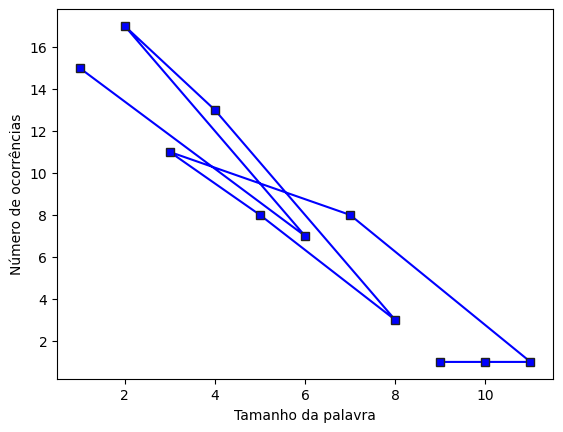

In [ ]:
from matplotlib import pyplot as plt

plt.plot(list(comprimentos.keys()),
         list(comprimentos.values()),
         marker='s',
         color='blue',
         markeredgecolor='#202020',)

plt.xlabel('Tamanho da palavra')
plt.ylabel('Número de ocorrências')

In [ ]:
sorted(comprimentos.items())

[(1, 15),
 (2, 17),
 (3, 11),
 (4, 13),
 (5, 8),
 (6, 7),
 (7, 8),
 (8, 3),
 (9, 1),
 (10, 1),
 (11, 1)]

In [ ]:
s_comprimentos = dict(sorted(comprimentos.items()))

In [ ]:
s_comprimentos

{1: 15, 2: 17, 3: 11, 4: 13, 5: 8, 6: 7, 7: 8, 8: 3, 9: 1, 10: 1, 11: 1}

Text(0, 0.5, 'Número de ocorrências')

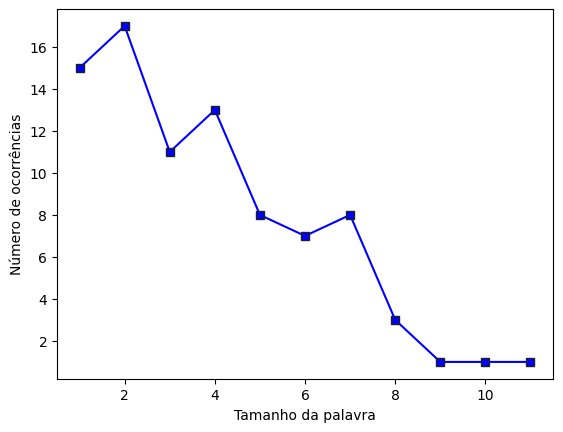

In [ ]:
plt.plot(list(s_comprimentos.keys()),
         list(s_comprimentos.values()),
         marker='s',
         color='blue',
         markeredgecolor='#202020',)

plt.xlabel('Tamanho da palavra')
plt.ylabel('Número de ocorrências')

**Conjuntos**

Um conjunto (*set*) é uma coleção não ordenada de objetos únicos. Esse tipo de estrutura de dados é útil para remover elementos duplicados ou para realizar operações de conjunto (união, intersecção e diferença)

Para criar um conjunto, podemos usar:

In [ ]:
s = set([1, 1, 4, 3, 2, 2, 3, 4, 1, 3, 'surprise !'])

In [ ]:
#note que itens duplicados são removidos, ficando
#apenas um elemento de cada tipo
s

{1, 2, 3, 4, 'surprise !'}

In [ ]:
#outra maneira de criar conjuntos {..., ...}
s = {1, 1, 4, 3, 2, 2, 3, 4, 1, 3, 'surprise !'}

In [ ]:
s

{1, 2, 3, 4, 'surprise !'}

In [ ]:
#cardinalidade
len(s)

5

In [ ]:
#contém ou não um elemento
2 in s, 5 in s, 6 not in s

(True, False, True)

In [ ]:
#podemos iterar
for item in s:
    print(item)

1
2
3
4
surprise !


*Métodos em conjuntos*

* *add*: adiciona elementos;
* *remove*: remove elementos;
* *discard*: remove elementos, mas não dá erro caso o elemento não exista;
* *pop*: remove elemento e retorna o valor;
* *clear*: remove todos os elementos.

In [ ]:
s = {2, -2, 0}

In [ ]:
s

{-2, 0, 2}

In [ ]:
s.add(1)
s.add(-1)
s.add(1.0)

In [ ]:
1.0==1

True

In [ ]:
#note que 1.0 não é considerado diferente de 1
s

{-2, -1, 0, 1, 2}

In [ ]:
1.0==1

In [ ]:
s.remove(1)

In [ ]:
s

{-2, -1, 0, 2}

In [ ]:
#retorna erro quando o elemento não existe
s.remove(3)

KeyError: ignored

In [ ]:
#não retorna erro quando o elemento não existe
s.discard(3)

In [ ]:
s

{-2, -1, 0, 2}

In [ ]:
#remove um elemento qualquer
s.pop()

0

In [ ]:
s

{-2, -1, 2}

In [ ]:
s.clear()

In [ ]:
#um conjunto vazio é representado como set()
s

set()

Objetos do tipo *set* têm uma variedade de métodos ligados às operações de conjunto:

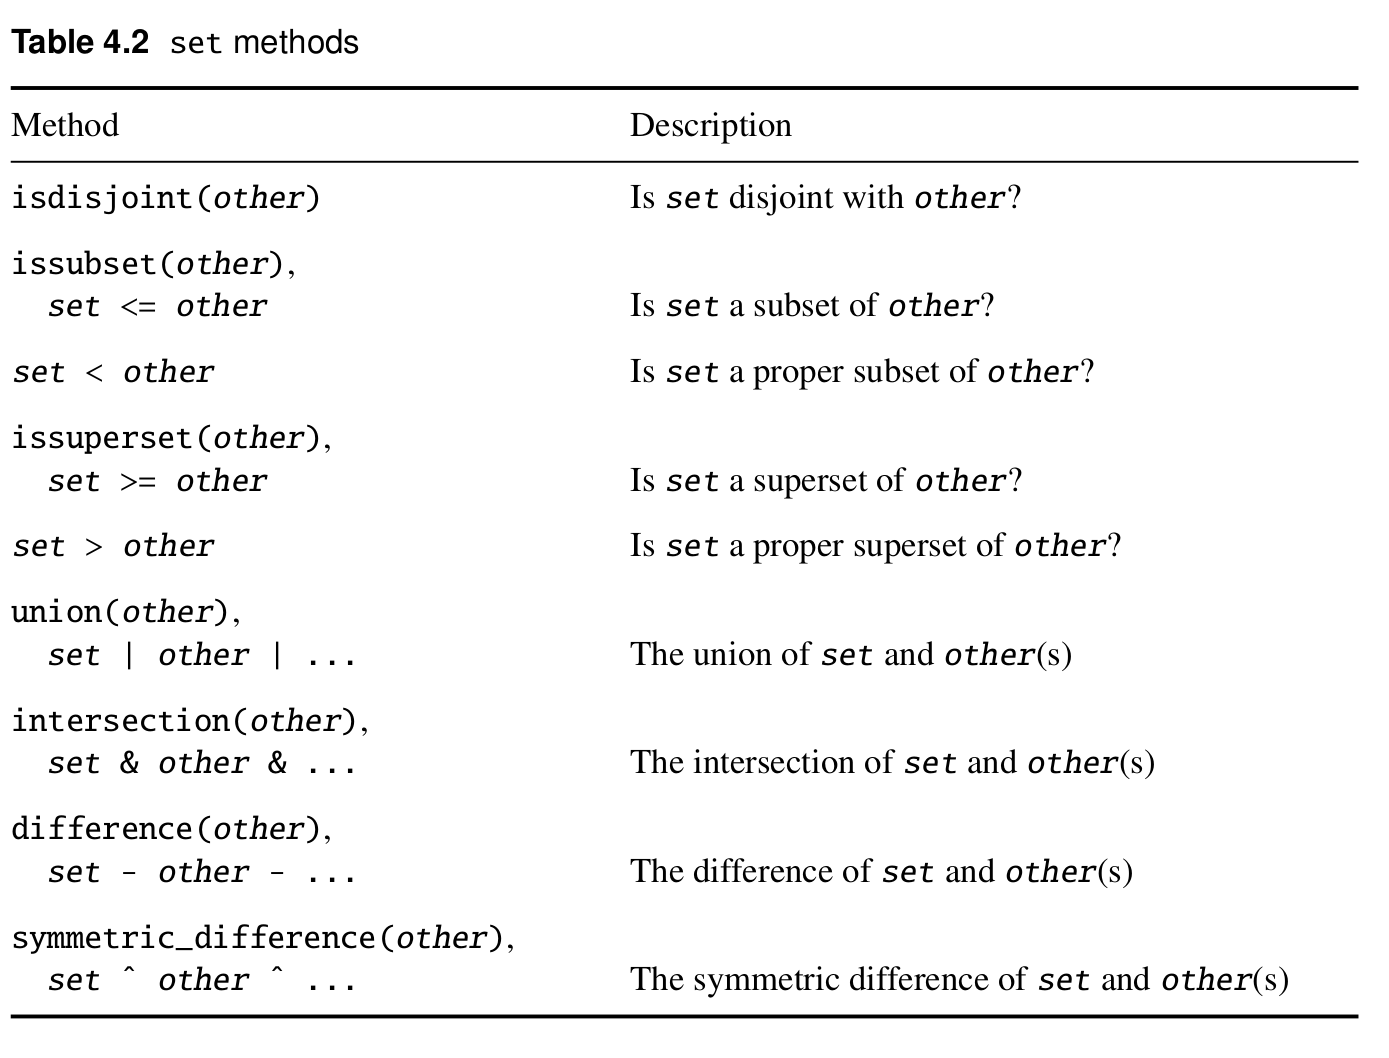

In [ ]:
A = set((1, 2, 3))
B = set((1, 2, 3, 4))

In [ ]:
#A é subconjunto de B
#Sim
A <= B

True

In [ ]:
#outra maneira
A.issubset(B)

True

In [ ]:
C, D = set((3, 4, 5, 6)), set((7, 8, 9))

In [ ]:
#união
#(1, 2, 3, 4) U (3, 4, 5, 6)
B | C

{1, 2, 3, 4, 5, 6}

In [ ]:
#união de outra maneira
B.union(C)

{1, 2, 3, 4, 5, 6}

In [ ]:
#união de mais conjuntos
#(1, 2, 3) U (3, 4, 5, 6) U (7, 8, 9)
A | C | D

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
#intersecção
# (1, 2, 3) int (3, 4, 5, 6)
A & C

{3}

In [ ]:
#intersecção
# (3, 4, 5, 6) in (7, 8, 9)
C & D

set()

In [ ]:
#nenhum elemento C existe em D
C.isdisjoint(D)

True

In [ ]:
#diferença: elementos do primeiro que não estão no segundo
#(1, 2, 3, 4) - (3, 4, 5, 6)
B - C

{1, 2}

In [ ]:
#diferença: elementos do primeiro que não estão no segundo
#(3, 4, 5, 6)-(1, 2, 3, 4)
#note que não é simétrico
C - B

{5, 6}

In [ ]:
#diferença simétrica: elementos que não estão em ambos
#(1, 2, 3, 4) - (3, 4, 5, 6)
B ^ C

{1, 2, 5, 6}

**frozensets**

*sets* são objetos mutáveis e seus elementos devem ser *hashable*.

Objetos imutáveis são *hashable*

In [ ]:
a = 156565
a.__hash__()

156565

In [ ]:
a = '156565'
a.__hash__()

-4391384191380546502

In [ ]:
a = [1,2,3,4]
a.__hash__()

TypeError: ignored

In [ ]:
a = (1,2,3,4)
a.__hash__()

590899387183067792

In [ ]:
a = set((1, 2, 3))

In [ ]:
a.__hash__()

TypeError: ignored

In [ ]:
a = set(('q', (1, 2), 2))

In [ ]:
a

{(1, 2), 2, 'q'}

In [ ]:
#note que a é conjunto.
#é um objeto mutável e unhashable
b = set(('q', (1, 2), 2, a))

TypeError: ignored

Para produzir conjuntos com elementos *unhashable* devemos usar um *frozenset*:

In [ ]:
a = frozenset((1, 2, 3))
a.__hash__()

-272375401224217160

In [ ]:
b = set(('q', (1, 2), a))

In [ ]:
#podemos modificar b
b.add(4)
b

{(1, 2), 4, frozenset({1, 2, 3}), 'q'}

In [ ]:
#não podemos modificar a
#frozensets são imutáveis
a.add(4)

AttributeError: ignored

In [ ]:
a

frozenset({1, 2, 3})